In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/content/Final Data.csv')
np.random.seed(0)

In [3]:
data.columns

Index(['Artist', 'Title', 'Label', 'Path', 'choruspath', 'chroma_stft_kew_0',
       'chroma_stft_min_0', 'chroma_stft_max_0', 'chroma_stft_std_0',
       'chroma_stft_mean_0',
       ...
       'tonnetz_mean_5', 'tonnetz_median_5', 'tonnetz_kurtosis_5',
       'zero_crossing_rate_kew_0', 'zero_crossing_rate_min_0',
       'zero_crossing_rate_max_0', 'zero_crossing_rate_std_0',
       'zero_crossing_rate_mean_0', 'zero_crossing_rate_median_0',
       'zero_crossing_rate_kurtosis_0'],
      dtype='object', length=523)

In [ ]:
data.tail()

,Artist,Title,Label,Path,choruspath,chroma_stft_kew_0,chroma_stft_min_0,chroma_stft_max_0,chroma_stft_std_0,chroma_stft_mean_0,...,tonnetz_mean_5,tonnetz_median_5,tonnetz_kurtosis_5,zero_crossing_rate_kew_0,zero_crossing_rate_min_0,zero_crossing_rate_max_0,zero_crossing_rate_std_0,zero_crossing_rate_mean_0,zero_crossing_rate_median_0,zero_crossing_rate_kurtosis_0
746,Gwen Stefani,Crash,0,Unpopular/Gwen Stefani - Crash.mp3,Unpopular/RepeatedUnpopularChorus/Gwen Stefani...,0.257423,0.023126,1.0,0.312051,0.498186,...,-0.029707,-0.026805,0.892997,1.622096,0.057732,0.331247,0.044447,0.155034,0.142721,3.141514
747,Gwen Stefani,Luxurious,0,Unpopular/Gwen Stefani - Luxurious (Remix Vers...,Unpopular/RepeatedUnpopularChorus/Gwen Stefani...,-0.020788,0.013594,1.0,0.327147,0.570372,...,0.002858,0.007586,0.429635,1.686463,0.045261,0.415374,0.070371,0.156106,0.137642,3.006131
748,Rihanna,If It's Lovin' That You Want,0,Unpopular/Rihanna - If It's Lovin' That You Wa...,Unpopular/RepeatedUnpopularChorus/Rihanna - If...,0.560998,0.000398,1.0,0.302554,0.458398,...,0.004888,0.000771,-0.075453,0.344456,0.025941,0.214603,0.035465,0.114828,0.112834,0.024774
749,Alicia Keys,Unbreakable,0,Unpopular/Alicia Keys - Unbreakable (Official ...,Unpopular/RepeatedUnpopularChorus/Alicia Keys ...,0.412242,0.028240,1.0,0.291556,0.489242,...,0.017730,-0.001053,1.118338,0.823857,0.010113,0.067619,0.012221,0.029605,0.029252,0.587163
750,Rascal Flatts,Skin (Sarabeth),0,Unpopular/Rascal Flatts - Skin (Sarabeth) (Off...,Unpopular/RepeatedUnpopularChorus/Rascal Flatt...,1.654606,0.007226,1.0,0.226309,0.212402,...,0.031773,0.016269,-0.560244,1.163344,0.022177,0.128571,0.024907,0.057123,0.050000,0.813294


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 751 entries, 0 to 750
Columns: 523 entries, Artist to zero_crossing_rate_kurtosis_0
dtypes: float64(518), int64(1), object(4)
memory usage: 3.0+ MB


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Label,751.0,0.487350,0.500173,0.000000,0.000000,0.000000,1.000000,1.000000
chroma_stft_kew_0,751.0,0.784881,0.566697,-0.716234,0.417220,0.768329,1.143469,3.263309
chroma_stft_min_0,751.0,0.017778,0.017097,0.000111,0.006177,0.013053,0.023679,0.157747
chroma_stft_max_0,751.0,0.999902,0.002163,0.943199,1.000000,1.000000,1.000000,1.000000
chroma_stft_std_0,751.0,0.278146,0.051261,0.135118,0.242600,0.278183,0.316032,0.425101
...,...,...,...,...,...,...,...,...
zero_crossing_rate_max_0,751.0,0.165769,0.055000,0.024308,0.128163,0.163265,0.198980,0.415374
zero_crossing_rate_std_0,751.0,0.025080,0.011336,0.003582,0.016995,0.022816,0.031181,0.072621
zero_crossing_rate_mean_0,751.0,0.099949,0.035043,0.014478,0.073220,0.099965,0.124223,0.212852
zero_crossing_rate_median_0,751.0,0.097418,0.036481,0.013197,0.069887,0.097891,0.121372,0.217528


In [ ]:
data['chroma_cens_kew_10'].dtype

dtype('float64')

In [ ]:
# artists with most unpopular songs
unpopular_chart = data[data['Label'] == 0 ].Artist.value_counts()  #groupby('Artist').size().reset_index()
unpopular_chart

Taylor Swift        24
Carrie Underwood    22
Justin Bieber       20
Rascal Flatts       18
Juice WRLD          17
                    ..
Shawn Mendes         1
Harry Styles         1
Sean Paul            1
Leona Lewis          1
Meghan Trainor       1
Name: Artist, Length: 68, dtype: int64

In [ ]:
# Artists with most popular songs
popular_chart = data[data['Label'] == 1].Artist.value_counts()
popular_chart

Taylor Swift        19
Drake               18
Rihanna             17
P!nk                13
Ariana Grande       11
                    ..
Fetty Wap            1
The Chainsmokers     1
Gwen Stefani         1
Camila Cabello       1
T.I.                 1
Name: Artist, Length: 70, dtype: int64

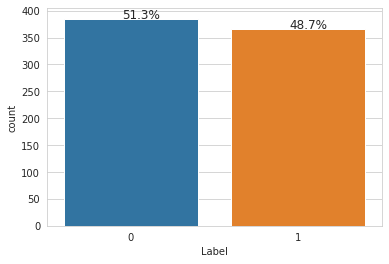

In [32]:
# Plot the count of total popular and unpopular songs
def without_hue(plot, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()
        

sns.set_style('whitegrid')
ax= sns.countplot(x = 'Label', data =data)
without_hue(ax,data['Label'])

**IQR** is another technique that one can use to detect and remove outliers. The formula for IQR is very simple. **IQR = Q3-Q1**. Where Q3 is 75th percentile and Q1 is 25th percentile. Once you have IQR you can find upper and lower limit by removing this formula,
**lower_limit** = Q1-1.5*IQR 
**upper_limit** = Q3 +1.5*IQR 
Anything less than a lower limit or above the upper limit is considered outlier. 

In [ ]:
# Plotting boxplot to detect outliers
def plot_boxplot(data, ft):
  data.boxplot(column=[ft])
  plt.grid(False)
  plt.show()


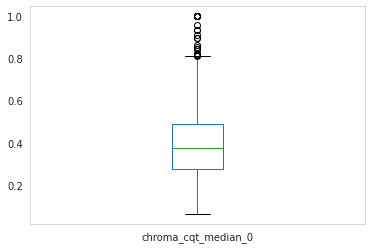

In [ ]:
plot_boxplot(data, "chroma_cqt_median_0") # Outliers plotted for feature "chroma_cqt_median_0"

In [16]:
# Detecting outlier using IQR (Inter Quantile Range )
def outliers(data, ft):
  Q1 = data[ft].quantile(0.25)
  Q3 = data[ft].quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  ls = data[(data[ft] < lower_bound) | (data[ft] > upper_bound)]
  return ls

In [11]:
median_features = data[["chroma_stft_median_0", "chroma_cqt_median_0", "chroma_cens_median_0", "mfcc_median_0", "rms_median_0", "spectral_centroid_median_0",
           "spectral_bandwidth_median_0", "spectral_contrast_median_0", "spectral_rolloff_median_0", "tonnetz_median_0", "zero_crossing_rate_median_0"]]

In [17]:
index_list = []
for feature in median_features:
  index_list.extend(outliers(data,feature))

In [ ]:
# Outliers detected
index_list

[22,
 64,
 83,
 180,
 186,
 212,
 375,
 379,
 546,
 551,
 666,
 72,
 87,
 92,
 98,
 99,
 131,
 469,
 490,
 492,
 517,
 549]

In [29]:
#Remove Outliers
def remove(data,ls):
  ls = sorted(set(ls))
  data2 = data.drop(ls)
  return data2
#remove(data, index_list)

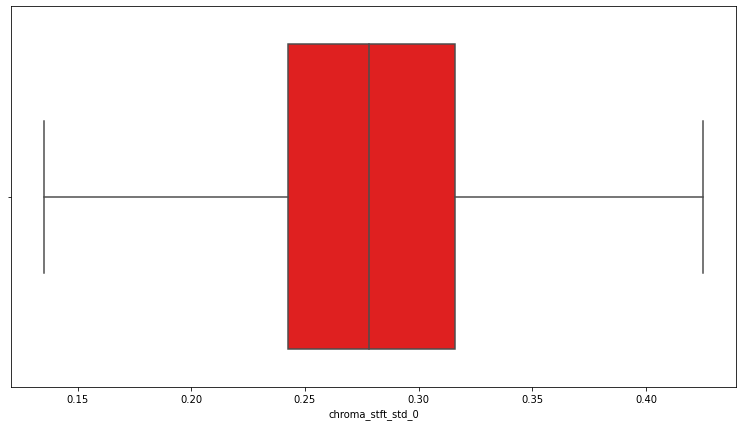

In [26]:
plt.figure(figsize=(13,7))
sns.boxplot(x=data['chroma_stft_std_0'], color='red')

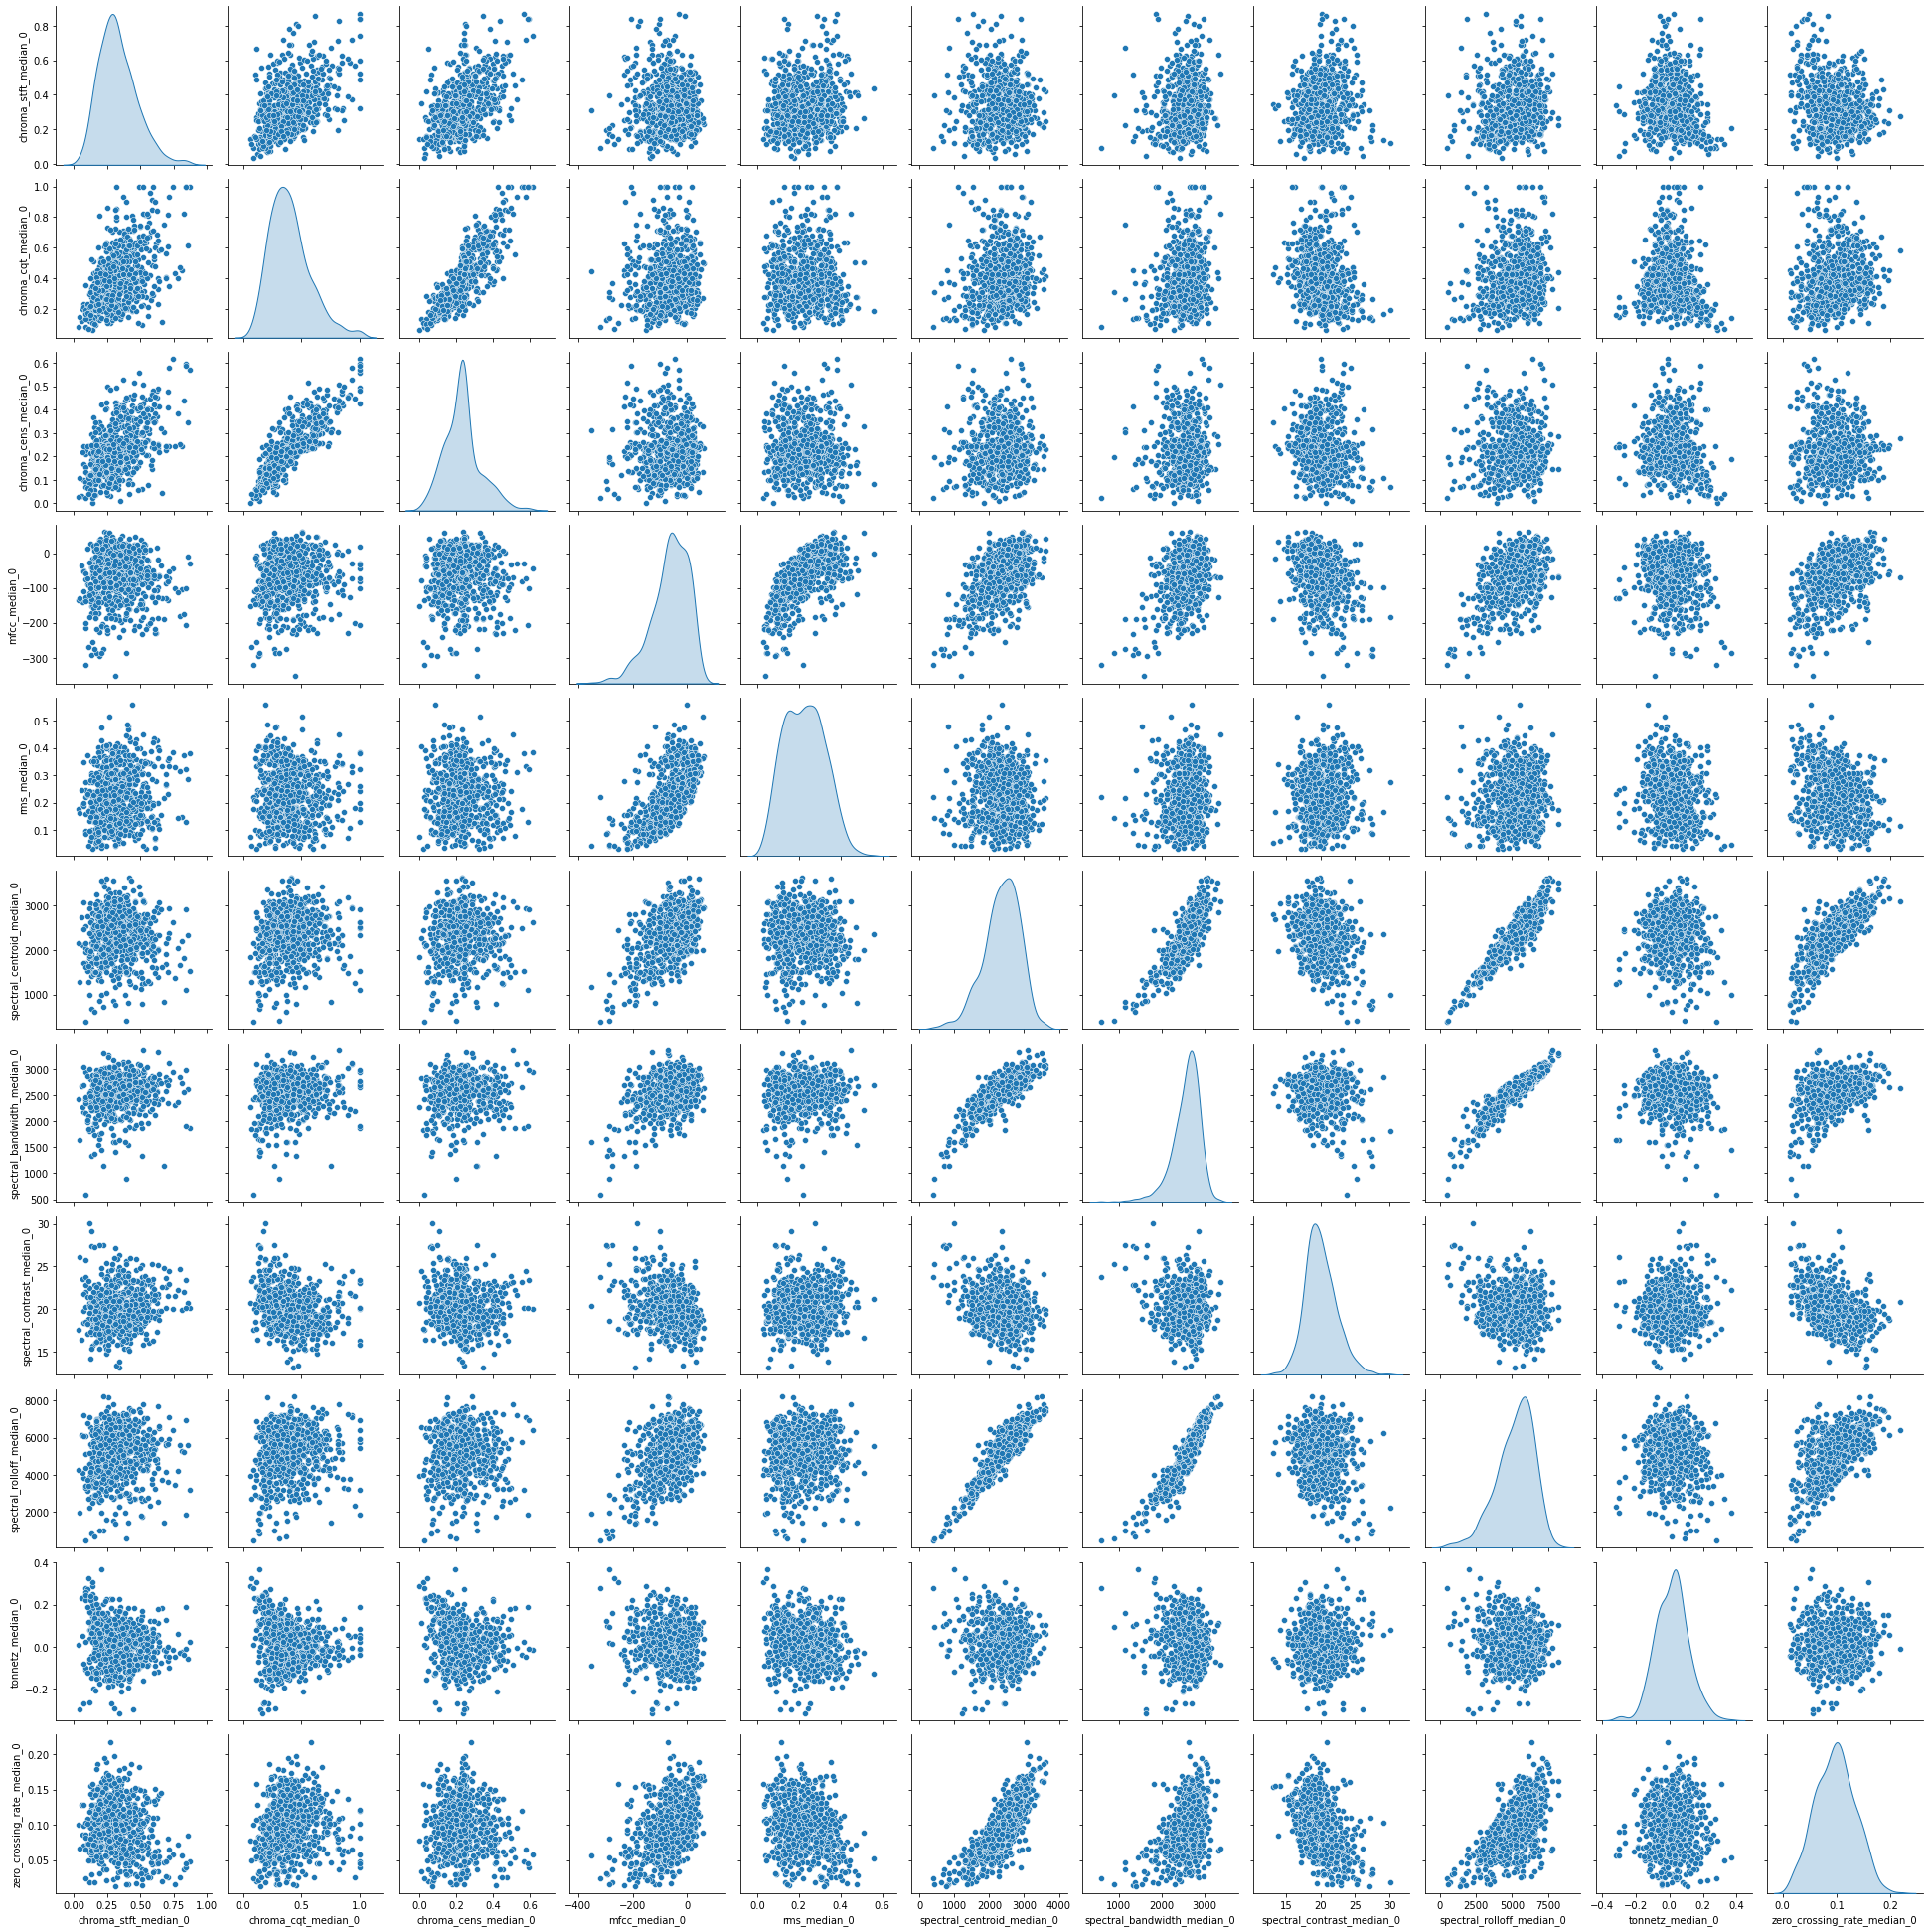

In [ ]:
#pair plotting of the median values of all major audio features
sns.pairplot(data[median_features], diag_kind = 'kde')

In [12]:
# Pearson Correlation or Default Correlation between median features
median_features.corr()

,chroma_stft_median_0,chroma_cqt_median_0,chroma_cens_median_0,mfcc_median_0,rms_median_0,spectral_centroid_median_0,spectral_bandwidth_median_0,spectral_contrast_median_0,spectral_rolloff_median_0,tonnetz_median_0,zero_crossing_rate_median_0
chroma_stft_median_0,1.000000,0.490356,0.520572,-0.029753,0.146084,-0.036752,0.112743,0.178764,0.061095,-0.154350,-0.234839
chroma_cqt_median_0,0.490356,1.000000,0.851314,0.099141,-0.013079,0.145979,0.154119,-0.202133,0.147390,-0.113067,0.133473
chroma_cens_median_0,0.520572,0.851314,1.000000,0.012023,-0.008460,0.033560,0.069625,-0.086826,0.045675,-0.152275,0.022569
mfcc_median_0,-0.029753,0.099141,0.012023,1.000000,0.626268,0.538913,0.441986,-0.328508,0.492996,-0.124281,0.438657
rms_median_0,0.146084,-0.013079,-0.008460,0.626268,1.000000,-0.030798,0.116429,0.069209,0.080478,-0.114432,-0.249175
spectral_centroid_median_0,-0.036752,0.145979,0.033560,0.538913,-0.030798,1.000000,0.831093,-0.308880,0.931476,-0.057445,0.809785
spectral_bandwidth_median_0,0.112743,0.154119,0.069625,0.441986,0.116429,0.831093,1.000000,-0.165200,0.932480,-0.098156,0.443143
spectral_contrast_median_0,0.178764,-0.202133,-0.086826,-0.328508,0.069209,-0.308880,-0.165200,1.000000,-0.202787,0.031800,-0.474932
spectral_rolloff_median_0,0.061095,0.147390,0.045675,0.492996,0.080478,0.931476,0.932480,-0.202787,1.000000,-0.075685,0.608684
tonnetz_median_0,-0.154350,-0.113067,-0.152275,-0.124281,-0.114432,-0.057445,-0.098156,0.031800,-0.075685,1.000000,0.007279


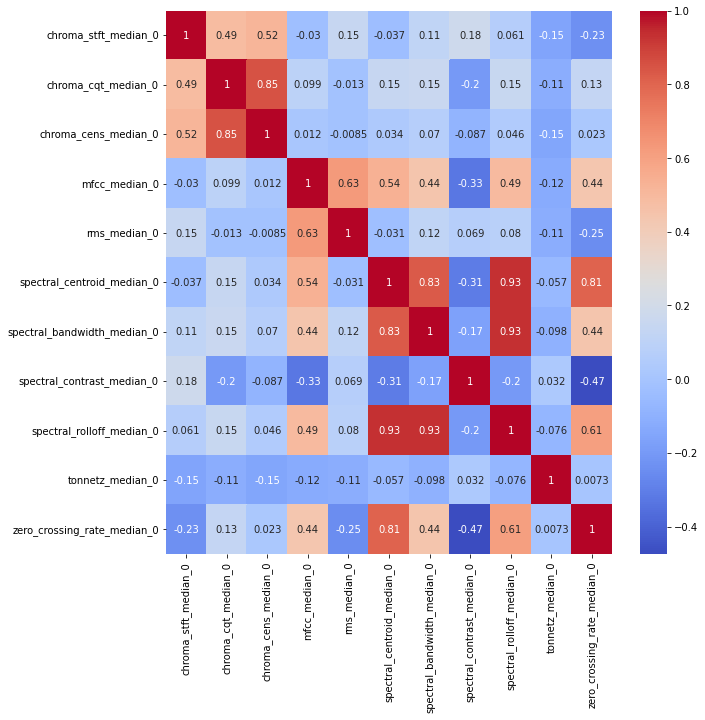

In [15]:
# Plotted directions of relationships and it's strengths between all median features
plt.figure(figsize=(10,10))
sns.heatmap(median_features.corr(), annot=True, cmap='coolwarm')

**Observance** : **positive** relations between (1. spectral_centroid_median_0 and spectral_rollof_median_0 , 2. spectral_bandwidth_median_0 and spectral_rollof_median_0) with **0.93** AND **negative** correlation between (spectral_contrast_median_0 and zero_crossing_rate_median_0) with **-0.47**

In [ ]:
# Checking if there are any missing values
missing_values = data.isnull().sum()
total_cells = np.product(data.shape)
total_missing = missing_values.sum()
total_missing

0

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
data1 = data.copy()
data1.drop(data1.columns[0:5],axis = 1, inplace = True)
data1

,chroma_stft_kew_0,chroma_stft_min_0,chroma_stft_max_0,chroma_stft_std_0,chroma_stft_mean_0,chroma_stft_median_0,chroma_stft_kurtosis_0,chroma_stft_kew_1,chroma_stft_min_1,chroma_stft_max_1,...,tonnetz_mean_5,tonnetz_median_5,tonnetz_kurtosis_5,zero_crossing_rate_kew_0,zero_crossing_rate_min_0,zero_crossing_rate_max_0,zero_crossing_rate_std_0,zero_crossing_rate_mean_0,zero_crossing_rate_median_0,zero_crossing_rate_kurtosis_0
0,0.091806,0.049545,1.0,0.306971,0.570429,0.556123,-1.389693,0.344998,0.035745,1.0,...,0.007217,-0.000351,-0.410349,-0.604349,0.022585,0.102132,0.017701,0.072071,0.074626,0.012681
1,1.025965,0.007265,1.0,0.274179,0.350277,0.265414,0.140231,0.379772,0.004221,1.0,...,-0.011851,-0.010293,0.099909,-0.233246,0.057460,0.229705,0.035304,0.147578,0.157302,-0.281870
2,1.395750,0.000648,1.0,0.307888,0.236975,0.087020,0.739644,1.646942,0.000456,1.0,...,0.001545,-0.009260,0.360879,0.742759,0.023492,0.178957,0.032571,0.077563,0.066463,-0.180427
3,0.926616,0.003467,1.0,0.242382,0.301311,0.262466,0.285644,0.843115,0.003586,1.0,...,-0.014834,-0.023444,0.456362,0.524002,0.051111,0.277596,0.045581,0.147997,0.142472,-0.344706
4,0.311976,0.037900,1.0,0.336300,0.517165,0.438171,-1.429111,0.892591,0.045833,1.0,...,0.005743,0.005232,-0.153372,2.700198,0.046848,0.235737,0.030815,0.097298,0.090204,7.939578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
746,0.257423,0.023126,1.0,0.312051,0.498186,0.443878,-1.335261,-0.236530,0.031392,1.0,...,-0.029707,-0.026805,0.892997,1.622096,0.057732,0.331247,0.044447,0.155034,0.142721,3.141514
747,-0.020788,0.013594,1.0,0.327147,0.570372,0.553099,-1.405522,1.232143,0.013089,1.0,...,0.002858,0.007586,0.429635,1.686463,0.045261,0.415374,0.070371,0.156106,0.137642,3.006131
748,0.560998,0.000398,1.0,0.302554,0.458398,0.369975,-0.900844,0.880603,0.008680,1.0,...,0.004888,0.000771,-0.075453,0.344456,0.025941,0.214603,0.035465,0.114828,0.112834,0.024774
749,0.412242,0.028240,1.0,0.291556,0.489242,0.398040,-1.180265,0.640337,0.016811,1.0,...,0.017730,-0.001053,1.118338,0.823857,0.010113,0.067619,0.012221,0.029605,0.029252,0.587163


In [ ]:
# scale our data so that each feature has a single unit variance 
scaler = StandardScaler()
#finding the principal components using the fit method, then apply the rotation and dimensionality reduction by calling transform().
scaler.fit(data1)
scaled_data = scaler.transform(data1)

In [ ]:
from sklearn.decomposition import PCA

**What is Principal Component Analysis and what is it used for?**

Principal Component Analysis, or more commonly known as PCA, is a way to reduce the number of variables while maintaining the majority of the important information. It transforms a number of variables that may be correlated into a smaller number of uncorrelated variables, known as principal components.

In [ ]:
# I selected dimensions of features from 518 to 2 by selecting no. of components to 2
pca = PCA(n_components = 2)

In [ ]:
pca.fit(scaled_data)

PCA(n_components=2)

In [ ]:
#transform this data to its first 2 principal components.
x_pca = pca.transform(scaled_data)

In [ ]:
print(scaled_data.shape)
print(x_pca.shape) # Dimensions reduced to 2

(751, 518)
(751, 2)


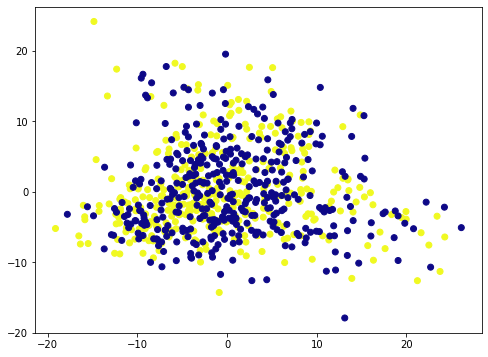

In [ ]:
plt.figure(figsize = (8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=data['Label'],cmap='plasma')


In [ ]:
principal_components = pd.DataFrame(data=x_pca , columns=["principal_component_1", "principal_component_2" ])
principal_components

,principal_component_1,principal_component_2
0,-7.731556,5.704028
1,14.046012,-2.891652
2,19.467098,-3.677412
3,9.399311,0.039033
4,-7.696428,1.791785
...,...,...
746,-2.891839,5.013421
747,4.538247,-2.359859
748,-1.201470,4.618572
749,-4.312453,7.763656


In [ ]:
features = ['principal_component_1',	'principal_component_2']

In [ ]:
pca.components_

array([[ 0.03366428, -0.05482138, -0.00127862, ..., -0.0280935 ,
        -0.03058927, -0.02165626],
       [-0.07931496,  0.04143361, -0.00543312, ..., -0.08708003,
        -0.09149447, -0.00994834]])

### **Variance :** It measures differences of set of data points around their mean value. The closer the datapoints are to the mean, the lower the result.

In [ ]:
# explained_variance_ratio_ (Percentage of the variance explained by each of the selected components and it explains usefulness of our principal components)
values = pca.explained_variance_ratio_
print ('Variance of each component',values) # Here pca 1st component explains 12%  variance and 2nd pca component explains 7% variance
print('Total Variance Explained:', round(sum(list(pca.explained_variance_ratio_))*100, 2))   # (pca_component1 + pca_component2) explains 19% variance

Variance of each component [0.12033476 0.07343435]
Total Variance Explained: 19.38


**Note :** Ideally, we should choose the number of components to include in your model by adding the explained variance ratio of each component until you reach a total of around 0.9 or 90% to avoid overfitting the model. But The above result showing that total variance explained only 19.38% using First Two Components. If we want to reach a total of 92% explained variance, it takes 142 Principal Components (PC).